### First Name: Evan 
### Last Name: Varan
### Number: 41

# Question 1:

In [24]:
#a)
colorDict = {
    "silver" : -2,
    "gold" : -1,
    "black" : 0,
    "brown" : 1,
    "red" : 2,
    "orange" : 3,
    "yellow" : 4,
    "green" : 5,
    "blue" : 6,
    "purple" : 7,
    "grey" : 8,
    "white" : 9,
}

def Color_Res(first_color,second_color,third_color, fourth_color):
    first_value = str(colorDict.get(first_color))
    second_value = str(colorDict.get(second_color))
    third_value = (10**colorDict.get(third_color))
    fourth_value = ""
    match fourth_color:
        case "brown":
            fourth_value = " ± 1%"
        case "red":
            fourth_value = " ± 2%"
        case "gold":
            fourth_value = " ± 5%"
        case "silver":
            fourth_value = " ± 10%"
    combined_string = str(int(first_value + second_value) * third_value) +fourth_value + " ohms"
    return combined_string

In [25]:
#b)
#https://www.geeksforgeeks.org/python-get-key-from-value-in-dictionary/# - Get key from value in dictionary
import math
def Res_Col(value,variability):
    if len(str(value)) == 1:
        first_value = 0
        second_value = value
    elif "." in str(value):
        first_value = int(str(value).split(".")[0])
        second_value = int(str(value).split(".")[1])
        if first_value == 0 and len(str(second_value)) == 2:
            first_value = int(str(second_value)[0])
            second_value = int(str(second_value)[1])
    else:
        first_value = int(str(value)[0])
        second_value = int(str(value)[1])
    third_value = value / int(str(first_value) + str(second_value))
    first_color = list(colorDict.keys())[list(colorDict.values()).index(first_value)]
    second_color = list(colorDict.keys())[list(colorDict.values()).index(second_value)]
    third_color = list(colorDict.keys())[list(colorDict.values()).index(math.log10(third_value))]
    fourth_color = ""
    match variability:
        case 1:
            fourth_color = "brown"
        case 2:
            fourth_color = "red"
        case 5:
            fourth_color = "gold"
        case 10:
            fourth_color = "silver"
    combined_string = first_color + "," + second_color + "," + third_color + "," + fourth_color
    return combined_string

In [26]:
#c)
#Verification of code
R = [1000,2000,3000,0.5,0.45,200,10,5,10000,700000]
tolerance = [1,5,10,2,1,2,5,10,5,2]
for i in range(len(R)):
    colors = Res_Col(R[i],tolerance[i])
    colorsList = colors.split(",")
    resistor_value = Color_Res(colorsList[0],colorsList[1],colorsList[2],colorsList[3]).split(" ")[0]
    if R[i] - float(resistor_value) != 0:
        print("Error!")

#Formatted table
print("Random Resistor       Color Code                  Resistance\n")
print("--------------------------------------------------------------\n")
for i in range(len(R)):
    colors = Res_Col(R[i],tolerance[i])
    colorsList = colors.split(",")
    resistor_value = Color_Res(colorsList[0],colorsList[1],colorsList[2],colorsList[3])
    print(str(R[i]) + "            " +colors + "            " + str(resistor_value) + "\n")
    

Random Resistor       Color Code                  Resistance

--------------------------------------------------------------

1000            brown,black,red,brown            1000 ± 1% ohms

2000            red,black,red,gold            2000 ± 5% ohms

3000            orange,black,red,silver            3000 ± 10% ohms

0.5            black,green,gold,red            0.5 ± 2% ohms

0.45            yellow,green,silver,brown            0.45 ± 1% ohms

200            red,black,brown,red            200 ± 2% ohms

10            brown,black,black,gold            10 ± 5% ohms

5            black,green,black,silver            5 ± 10% ohms

10000            brown,black,orange,gold            10000 ± 5% ohms

700000            purple,black,yellow,red            700000 ± 2% ohms


# Problem 2 

In [27]:
#a)
#https://www.w3schools.com/python/numpy/numpy_array_shape.asp - .shape documentation

import random

def fillMatrix(n,m):
    matrix = []
    for i in range(n):
        newRow = []
        for j in range(m):
            newRow.append(j) 
        matrix.append(newRow)
    return matrix

def multiplyMatrix(matrix1,matrix2):
    newMatrix = []
    total = 0
    numberRows = len(matrix1)
    numberCols = len(matrix2[0])
    for v in range(numberRows):
        newRow = []
        for j in range(numberCols):
            col = getColumn(matrix2,j)
            row = matrix1[v]
            for i in range(len(row)):
                total = total + (row[i]*col[i])
            newRow.append(total)
            total = 0
        newMatrix.append(newRow)
    return newMatrix

def getColumn(matrix, index):
    column = []
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if j == index:
                column.append(matrix[i][j])
    return column

matrixMultiplied4 = multiplyMatrix(fillMatrix(4,4),fillMatrix(4,4))
matrixMultiplied6 = multiplyMatrix(fillMatrix(6,6),fillMatrix(6,6))
matrixMultiplied10 = multiplyMatrix(fillMatrix(10,10),fillMatrix(10,10))
matrixMultiplied20 = multiplyMatrix(fillMatrix(20,20),fillMatrix(20,20))
print(f'4 by 4 times a 4 by 4: {matrixMultiplied4}\n')
print(f'6 by 6 times a 6 by 6: {matrixMultiplied6}\n')
print(f'10 by 10 times a 10 by 10: {matrixMultiplied10}\n')
print(f'20 by 20 times a 20 by 20: {matrixMultiplied20}\n')

4 by 4 times a 4 by 4: [[0, 6, 12, 18], [0, 6, 12, 18], [0, 6, 12, 18], [0, 6, 12, 18]]

6 by 6 times a 6 by 6: [[0, 15, 30, 45, 60, 75], [0, 15, 30, 45, 60, 75], [0, 15, 30, 45, 60, 75], [0, 15, 30, 45, 60, 75], [0, 15, 30, 45, 60, 75], [0, 15, 30, 45, 60, 75]]

10 by 10 times a 10 by 10: [[0, 45, 90, 135, 180, 225, 270, 315, 360, 405], [0, 45, 90, 135, 180, 225, 270, 315, 360, 405], [0, 45, 90, 135, 180, 225, 270, 315, 360, 405], [0, 45, 90, 135, 180, 225, 270, 315, 360, 405], [0, 45, 90, 135, 180, 225, 270, 315, 360, 405], [0, 45, 90, 135, 180, 225, 270, 315, 360, 405], [0, 45, 90, 135, 180, 225, 270, 315, 360, 405], [0, 45, 90, 135, 180, 225, 270, 315, 360, 405], [0, 45, 90, 135, 180, 225, 270, 315, 360, 405], [0, 45, 90, 135, 180, 225, 270, 315, 360, 405]]

20 by 20 times a 20 by 20: [[0, 190, 380, 570, 760, 950, 1140, 1330, 1520, 1710, 1900, 2090, 2280, 2470, 2660, 2850, 3040, 3230, 3420, 3610], [0, 190, 380, 570, 760, 950, 1140, 1330, 1520, 1710, 1900, 2090, 2280, 2470, 2660, 28

In [28]:
#b)
import numpy as np

def multiplyMatrixNumpy(matrix1,matrix2):
    return np.dot(matrix1,matrix2)

matrixMultiplied4NP = multiplyMatrixNumpy(fillMatrix(4,4),fillMatrix(4,4))
matrixMultiplied6NP = multiplyMatrixNumpy(fillMatrix(6,6),fillMatrix(6,6))
matrixMultiplied10NP = multiplyMatrixNumpy(fillMatrix(10,10),fillMatrix(10,10))
matrixMultiplied20NP = multiplyMatrixNumpy(fillMatrix(20,20),fillMatrix(20,20))
print(f'4 by 4 times a 4 by 4: {matrixMultiplied4NP}\n')
print(f'6 by 6 times a 6 by 6: {matrixMultiplied6NP}\n')
print(f'10 by 10 times a 10 by 10: {matrixMultiplied10NP}\n')
print(f'20 by 20 times a 20 by 20: {matrixMultiplied20NP}\n')

4 by 4 times a 4 by 4: [[ 0  6 12 18]
 [ 0  6 12 18]
 [ 0  6 12 18]
 [ 0  6 12 18]]

6 by 6 times a 6 by 6: [[ 0 15 30 45 60 75]
 [ 0 15 30 45 60 75]
 [ 0 15 30 45 60 75]
 [ 0 15 30 45 60 75]
 [ 0 15 30 45 60 75]
 [ 0 15 30 45 60 75]]

10 by 10 times a 10 by 10: [[  0  45  90 135 180 225 270 315 360 405]
 [  0  45  90 135 180 225 270 315 360 405]
 [  0  45  90 135 180 225 270 315 360 405]
 [  0  45  90 135 180 225 270 315 360 405]
 [  0  45  90 135 180 225 270 315 360 405]
 [  0  45  90 135 180 225 270 315 360 405]
 [  0  45  90 135 180 225 270 315 360 405]
 [  0  45  90 135 180 225 270 315 360 405]
 [  0  45  90 135 180 225 270 315 360 405]
 [  0  45  90 135 180 225 270 315 360 405]]

20 by 20 times a 20 by 20: [[   0  190  380  570  760  950 1140 1330 1520 1710 1900 2090 2280 2470
  2660 2850 3040 3230 3420 3610]
 [   0  190  380  570  760  950 1140 1330 1520 1710 1900 2090 2280 2470
  2660 2850 3040 3230 3420 3610]
 [   0  190  380  570  760  950 1140 1330 1520 1710 1900 2090 2280 2

In [29]:
#c)
def compareMatricies(matrixNorm,matrixNumpy):
    for i in range(len(matrixNorm)):
        for j in range(len(matrixNorm[i])):
            if matrixNorm[i][j] != matrixNumpy[i][j]:
                return False
    return True

print(compareMatricies(matrixMultiplied4,matrixMultiplied4NP))
print(compareMatricies(matrixMultiplied6,matrixMultiplied6NP))
print(compareMatricies(matrixMultiplied10,matrixMultiplied10NP))
print(compareMatricies(matrixMultiplied20,matrixMultiplied20NP))

True
True
True
True


In [30]:
#d)
#https://docs.python.org/3/library/timeit.html - timeit documentation
import timeit
def compareTime(size):
    timeNorm = timeit.timeit(lambda: multiplyMatrix(fillMatrix(size,size),fillMatrix(size,size)), number=10000)
    timeNumpy = timeit.timeit(lambda: multiplyMatrixNumpy(fillMatrix(size,size),fillMatrix(size,size)), number=10000)
    print("Time for a " + str(size) + " by " + str(size) + " matrix with my calculations: " + str(timeNorm) + " seconds. ")
    print("Time for a " + str(size) + " by " + str(size) + " matrix with numpy: " + str(timeNumpy) + " seconds. ")
compareTime(4)
compareTime(6)
compareTime(10)
compareTime(20) #note that this took 86 seconds to run when I tested it

Time for a 4 by 4 matrix with my calculations: 0.48421330004930496 seconds. 
Time for a 4 by 4 matrix with numpy: 0.12218050006777048 seconds. 
Time for a 6 by 6 matrix with my calculations: 1.8436746000079438 seconds. 
Time for a 6 by 6 matrix with numpy: 0.25201739999465644 seconds. 
Time for a 10 by 10 matrix with my calculations: 8.902896499959752 seconds. 
Time for a 10 by 10 matrix with numpy: 0.43814490002114326 seconds. 
Time for a 20 by 20 matrix with my calculations: 74.31976169999689 seconds. 
Time for a 20 by 20 matrix with numpy: 1.1775597999803722 seconds. 


# Question 3.

Text(0, 0.5, 'x(t)')

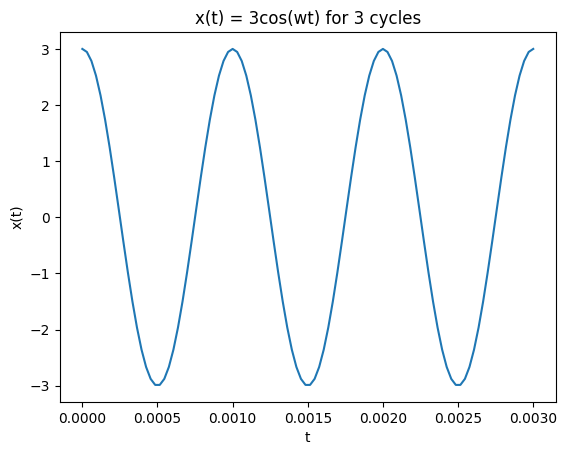

In [31]:
#a)
#https://www.geeksforgeeks.org/plotting-sine-and-cosine-graph-using-matloplib-in-python/#
import numpy as np
import matplotlib.pyplot as plt

frequency = 1000
omega = frequency * 2 * np.pi
T = 1/frequency # 1 cycle time (period)
t = np.linspace(0,3*T,100) #from 0 to 3 cycles with 100 samples
x_t = 3 * np.cos(omega * t)
plt.plot(t,x_t)
plt.title("x(t) = 3cos(wt) for 3 cycles")
plt.xlabel("t")
plt.ylabel("x(t)")

Text(0, 0.5, 'x[n]')

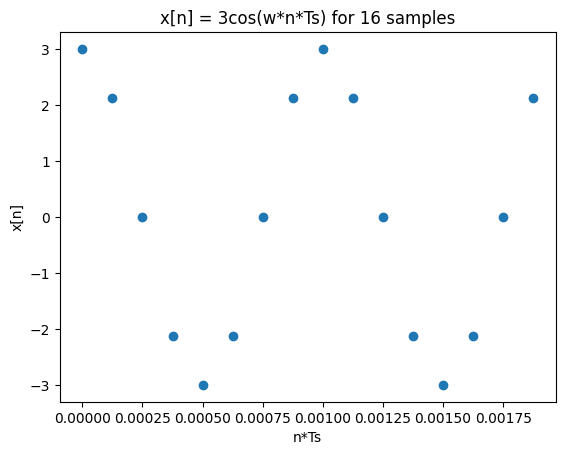

In [32]:
#b)
fs = 8000 # sampling frequency
N = 16 # number of samples
n = np.arange(0,N)
Ts = 1/fs #sampling period  = 1/sampling frequency
x_n = 3 * np.cos(omega * n * Ts)
plt.plot(n*Ts,x_n, 'o')

plt.title("x[n] = 3cos(w*n*Ts) for 16 samples")
plt.xlabel("n*Ts")
plt.ylabel("x[n]")

Text(0.5, 1.0, 'x[n] and x(t)')

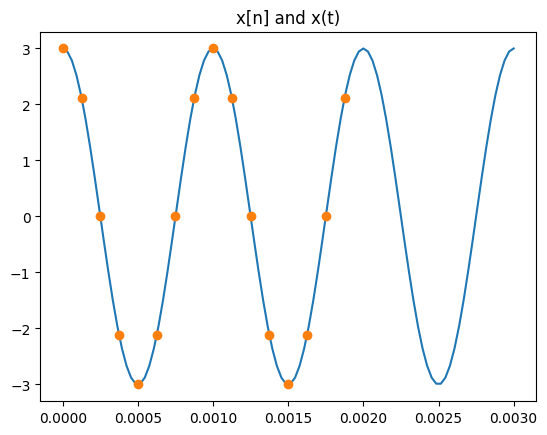

In [33]:
#c)
plt.plot(t,x_t,n*Ts,x_n,'o')
plt.title("x[n] and x(t)")

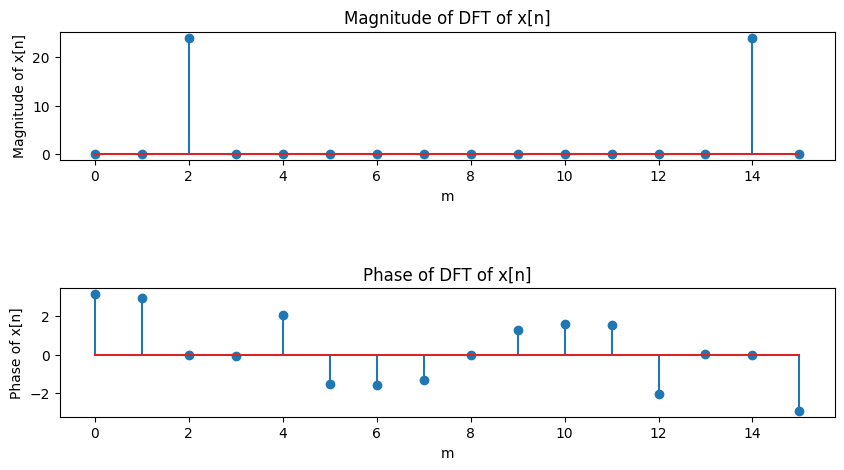

In [34]:
#d)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html subplot documentation
#Also used notes from zoom lecture 10/18/24 

x_m = np.fft.fft(x_n)
mag = np.abs(x_m)
phase = np.angle(x_m)

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.stem(n, mag)
plt.title("Magnitude of DFT of x[n]")
plt.xlabel("m")
plt.ylabel("Magnitude of x[n]")


plt.subplot(2, 1, 2)
plt.stem(n, phase)
plt.title("Phase of DFT of x[n]")
plt.xlabel("m")
plt.ylabel("Phase of x[n]")
plt.subplots_adjust(hspace=1)

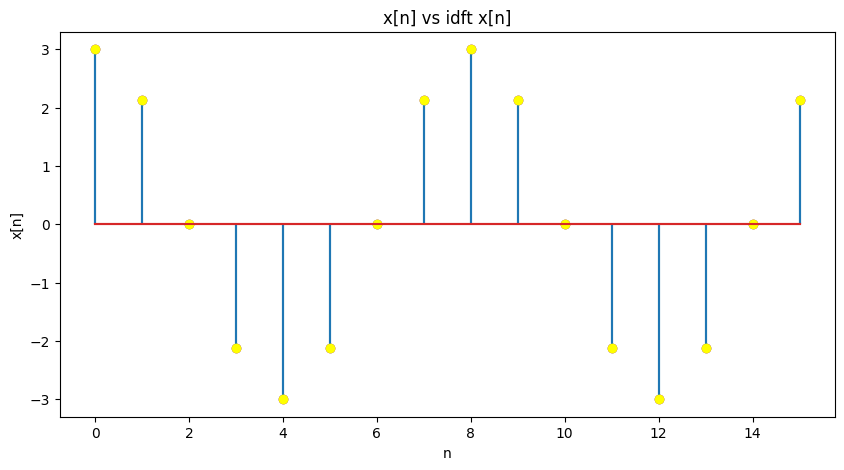

In [35]:
#e) and f)
#markerfmt - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html
#numpy ifft documentation - https://numpy.org/doc/2.0/reference/generated/numpy.fft.ifft.html
#"real" keyword - https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.ifft.html

x_n_idft = np.fft.ifft(x_m)

plt.figure(figsize=(10, 5))
plt.stem(n, x_n, markerfmt= "purple")
plt.stem(n, x_n_idft.real, markerfmt= "yellow") #only plot real components of idft since x[n] also only has real components
plt.title("x[n] vs idft x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.subplots_adjust(hspace=1)

# Question 4.

In [36]:
#a)
import random
x = []
y = []
z = []
for i in range(20):
    x.append(random.randint(1,5))
    y.append(random.randint(1,5))
    z.append(random.randint(1,5))

k = []
m = []
kMinusM = []
for i in range(len(x)):
    k.append(x[i] + 3*y[i] + z[i])
    m.append(x[i] * y[i] * (z[i]**2))
    kMinusM.append(k[i]-m[i])

print("Non numpy k: " + str(k))
print("Non numpy m: " + str(m))
print("Non numpy k - m: " + str(kMinusM) + "\n")

#Extra Credit with numpy - https://numpy.org/doc/stable/reference/generated/numpy.array.html

xnp = np.array(x)
ynp = np.array(y)
znp = np.array(z)

knp = xnp + 3*ynp + znp
mnp = xnp * ynp * (znp ** 2)
kMinusMnp = knp - mnp

print("Numpy k: " + str(knp))
print("Numpy m: " + str(mnp))
print("Numpy k - m: " + str(kMinusMnp))

Non numpy k: [16, 19, 19, 19, 24, 14, 14, 16, 15, 11, 11, 13, 9, 15, 13, 10, 15, 9, 22, 20]
Non numpy m: [150, 40, 80, 40, 500, 54, 36, 60, 160, 64, 45, 96, 8, 8, 72, 48, 15, 32, 240, 180]
Non numpy k - m: [-134, -21, -61, -21, -476, -40, -22, -44, -145, -53, -34, -83, 1, 7, -59, -38, 0, -23, -218, -160]

Numpy k: [16 19 19 19 24 14 14 16 15 11 11 13  9 15 13 10 15  9 22 20]
Numpy m: [150  40  80  40 500  54  36  60 160  64  45  96   8   8  72  48  15  32
 240 180]
Numpy k - m: [-134  -21  -61  -21 -476  -40  -22  -44 -145  -53  -34  -83    1    7
  -59  -38    0  -23 -218 -160]


<StemContainer object of 3 artists>

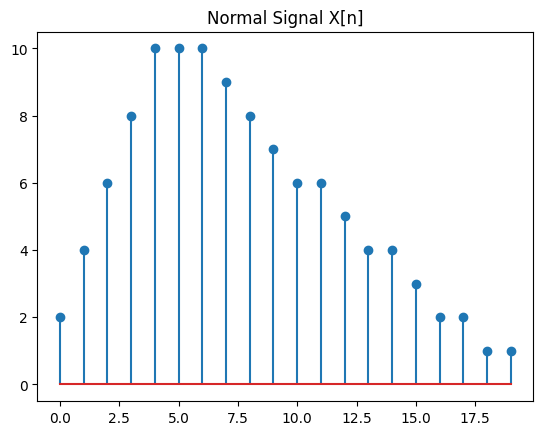

In [37]:
#bi)
x_n = [2,4,6,8,10,10,10,9,8,7,6,6,5,4,4,3,2,2,1,1]
plt.title("Normal Signal X[n]")
plt.stem(x_n)

<StemContainer object of 3 artists>

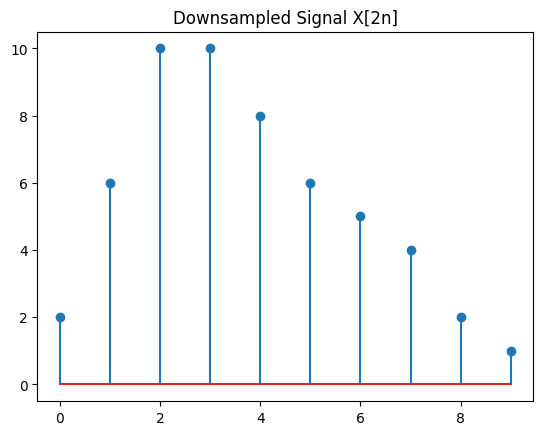

In [38]:
#ii)
x_2n = x_n[::2]
plt.title("Downsampled Signal X[2n]")
plt.stem(x_2n)

<StemContainer object of 3 artists>

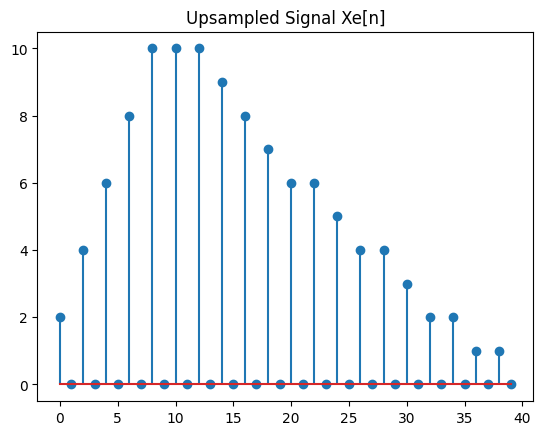

In [39]:
#iii)
xe_n = []
for i in range(len(x_n) * 2):
    if i % 2 == 0:
        index = int(i/2)
        xe_n.append(x_n[index])
    else:
        xe_n.append(0)

plt.title("Upsampled Signal Xe[n]")
plt.stem(xe_n)

<StemContainer object of 3 artists>

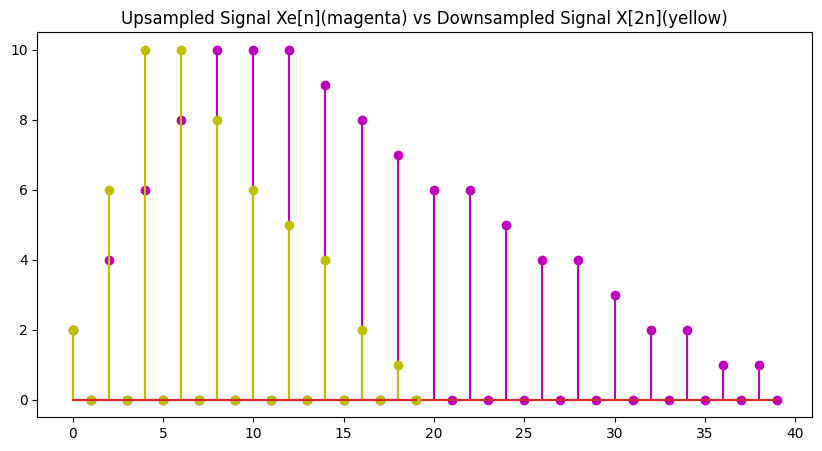

In [40]:
#Checking
xe_nTest = []
for num in x_2n:
    xe_nTest.append(num)
    xe_nTest.append(0)
    
plt.figure(figsize=(10,5))
plt.title("Upsampled Signal Xe[n](magenta) vs Downsampled Signal X[2n](yellow)")
plt.stem(xe_n,linefmt='m-')
plt.stem(xe_nTest,linefmt='y-')

<StemContainer object of 3 artists>

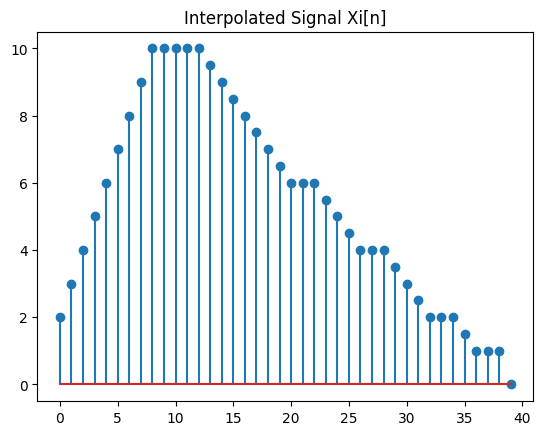

In [41]:
#iv)
xi_n = xe_n
for i in range(len(xi_n) - 1):
    if xi_n[i] == 0:
        xi_n[i] = (xi_n[i+1] + xi_n[i-1])/2
        
plt.title("Interpolated Signal Xi[n]")
plt.stem(xi_n)

Text(0.5, 1.0, 'Interpolated Signal Xi[n](yellow) vs Normal Signal X[n](magenta)')

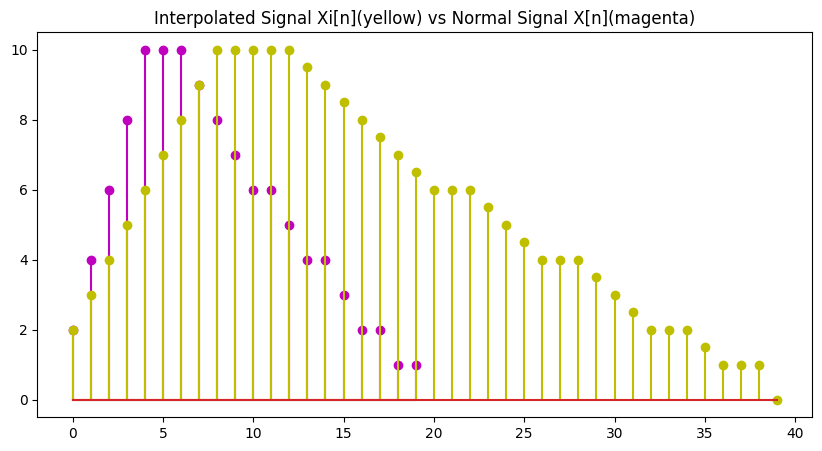

In [42]:
#v)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.stem.html

plt.figure(figsize=(10,5))
plt.stem(x_n,linefmt='m-')
plt.stem(xi_n,linefmt='y-')

plt.title("Interpolated Signal Xi[n](yellow) vs Normal Signal X[n](magenta)")

# Question 5.

In [43]:
#a)
#https://math.libretexts.org/Bookshelves/Algebra/Intermediate_Algebra_1e_(OpenStax)/04%3A_Systems_of_Linear_Equations/4.06%3A_Solve_Systems_of_Equations_Using_Matrices
#https://www.mathsisfun.com/algebra/matrix-inverse.html
#https://byjus.com/maths/adjoint-of-a-matrix/
#https://www.chilimath.com/lessons/advanced-algebra/determinant-3x3-matrix/
#https://byjus.com/maths/determinant-of-4x4-matrix/
#https://matrixcalc.org/slu.html

def findDeterminant2x2(m):
    a = m[0][0]
    b = m[0][1]
    c = m[1][0]
    d = m[1][1]
    return (a * d) - (b * c)

def findDeterminant3x3(m):
    a = m[0][0]
    b = m[0][1]
    c = m[0][2]
    d = m[1][0]
    e = m[1][1]
    f = m[1][2]
    g = m[2][0]
    h = m[2][1]
    i = m[2][2]
    determinant = a * findDeterminant2x2([[e,f],[h,i]]) - b * findDeterminant2x2([[d,f],[g,i]]) + c * findDeterminant2x2([[d,e],[g,h]])
    return determinant

def findDeterminant4x4(ma):
    a = ma[0][0]
    b = ma[0][1]
    c = ma[0][2]
    d = ma[0][3]
    e = ma[1][0]
    f = ma[1][1]
    g = ma[1][2]
    h = ma[1][3]
    i = ma[2][0]
    j = ma[2][1]
    k = ma[2][2]
    l = ma[2][3]
    m = ma[3][0]
    n = ma[3][1]
    o = ma[3][2]
    p = ma[3][3]
    determinant = a * findDeterminant3x3([[f,g,h],[j,k,l],[n,o,p]]) - b * findDeterminant3x3([[e,g,h],[i,k,l],[m,o,p]]) + c * findDeterminant3x3([[e,f,h],[i,j,l],[m,n,p]]) - d * findDeterminant3x3([[e,f,g],[i,j,k],[m,n,o]])
    return determinant

def findInverseMatrix(m,constant):
    inverse_matrix = []
    for i in range(len(m)):
        newRow = []
        for j in range(len(m[i])):
            newRow.append(m[i][j] * constant) 
        inverse_matrix.append(newRow)
    return inverse_matrix

def findAdjugate4x4(ma):
    a = ma[0][0]
    b = ma[0][1]
    c = ma[0][2]
    d = ma[0][3]
    e = ma[1][0]
    f = ma[1][1]
    g = ma[1][2]
    h = ma[1][3]
    i = ma[2][0]
    j = ma[2][1]
    k = ma[2][2]
    l = ma[2][3]
    m = ma[3][0]
    n = ma[3][1]
    o = ma[3][2]
    p = ma[3][3]
    
    a11 = findDeterminant3x3([[f,g,h],[j,k,l],[n,o,p]])
    a12 = -findDeterminant3x3([[e,g,h],[i,k,l],[m,o,p]])
    a13 = findDeterminant3x3([[e,f,h],[i,j,l],[m,n,p]])
    a14 = -findDeterminant3x3([[e,f,g],[i,j,k],[m,n,o]])
    
    a21 = -findDeterminant3x3([[b,c,d],[j,k,l],[n,o,p]])
    a22 = findDeterminant3x3([[a,c,d],[i,k,l],[m,o,p]])
    a23 = -findDeterminant3x3([[a,b,d],[i,j,l],[m,n,p]])
    a24 = findDeterminant3x3([[a,b,c],[i,j,k],[m,n,o]])
    
    a31 = findDeterminant3x3([[b,c,d],[f,g,h],[n,o,p]])
    a32 = -findDeterminant3x3([[a,c,d],[e,g,h],[m,o,p]])
    a33 = findDeterminant3x3([[a,b,d],[e,f,h],[m,n,p]])
    a34 = -findDeterminant3x3([[a,b,c],[e,f,g],[m,n,o]])
    
    a41 = -findDeterminant3x3([[b,c,d],[f,g,h],[j,k,l]])
    a42 = findDeterminant3x3([[a,c,d],[e,g,h],[i,k,l]])
    a43 = -findDeterminant3x3([[a,b,d],[e,f,h],[i,j,l]])
    a44 = findDeterminant3x3([[a,b,c],[e,f,g],[i,j,k]])
    
    adjugateMatrix = [[a11,a12,a13,a14],[a21,a22,a23,a24],[a31,a32,a33,a34],[a41,a42,a43,a44]] 
    return adjugateMatrix

def findAdjugate3x3(m):
    a = m[0][0]
    b = m[0][1]
    c = m[0][2]
    d = m[1][0]
    e = m[1][1]
    f = m[1][2]
    g = m[2][0]
    h = m[2][1]
    i = m[2][2]
    

    adjugateMatrix = [[findDeterminant2x2([[e,f],[h,i]]) , -1 * findDeterminant2x2([[b,c],[h,i]]), findDeterminant2x2([[b,c],[e,f]])],
                      [ -1 * findDeterminant2x2([[d,f],[g,i]]) , findDeterminant2x2([[a,c],[g,i]]), -1 * findDeterminant2x2([[a,c],[d,f]])],
                      [findDeterminant2x2([[d,e],[g,h]]) , -1 * findDeterminant2x2([[a,b],[g,h]]), findDeterminant2x2([[a,b],[d,e]])]]
    return adjugateMatrix



def LinSolve(equationsMatrix,answersMatrix,numVariables):
    if numVariables == 3:
        det_Matrix = findDeterminant3x3(equationsMatrix)
        inverse_Matrix = findInverseMatrix(findAdjugate3x3(equationsMatrix),1/det_Matrix)
        solution_3x3 = multiplyMatrix(inverse_Matrix, answersMatrix)
        x1 = solution_3x3[0][0]
        x2 = solution_3x3[1][0]
        x3 = solution_3x3[2][0]
        print("Solution 3x3: x1 = " + str(x1) + ", x2 = " + str(x2) + ", x3 = "+ str(x3))
    elif numVariables == 4:
        det_Matrix = findDeterminant4x4(equationsMatrix)
        inverse_Matrix = findInverseMatrix(findAdjugate4x4(equationsMatrix),1/det_Matrix)
        solution_4x4 = multiplyMatrix(inverse_Matrix, answersMatrix)
        x1 = solution_4x4[0][0]
        x2 = solution_4x4[1][0]
        x3 = solution_4x4[2][0]
        x4 = solution_4x4[3][0]
        print("Solution 4x4: x1 = " + str(x1) + ", x2 = " + str(x2) + ", x3 = "+ str(x3) + ", x4 = "+ str(x4))
        
A = [[2, 1, 1],
     [1, 3, -1],
     [1, 1, 1]]
A_answers = [[3],[7],[1]]

B = [[3, -3, 1, 7],
     [1, -1, 2, -9],
     [2, 4, 1, 6],
     [9, 1, -3, 4]]
B_answers = [[12],[3],[1],[5]]

LinSolve(A,A_answers,3)
LinSolve(B,B_answers,4)

Solution 3x3: x1 = 2.0, x2 = 1.0, x3 = -2.0
Solution 4x4: x1 = 0.4717868338557994, x2 = 0.9305120167189134, x3 = 1.1311389759665624, x4 = 0.8213166144200628


In [44]:
#b)
#https://www.w3schools.com/python/module_cmath.asp

import cmath
import math

w1 = 3 + 4j
w2 = 2 * math.e ** ((1j * math.pi)/4)

#i).
w1_r,w1_phi = cmath.polar(w1)
#ii).
w2_r,w2_phi = cmath.polar(w2)
w2_rectangular = cmath.rect(w2_r,w2_phi)
#iii).
w1_abs_squared = abs(w1) ** 2
w2_abs_squared = abs(w1) ** 2
#iv).
w1_rectangular = cmath.rect(w1_r,w1_phi)
w1_plus_w2 = w1_rectangular + w2_rectangular
#v).
w1_minus_w2 = w1_rectangular - w2_rectangular
#vi).
w1_times_w2 = w1_rectangular * w2_rectangular
#vii).
w1_dividedby_w2 = w1_rectangular / w2_rectangular

print("Express w1 in standard polar form: " + str(w1_r) + ", " + str(w1_phi))
print("Express w2 in standard rectangular form: " + str(w2_rectangular))
print("Determine |w1|^2 and |w2|^2: " + str(w1_abs_squared) + ", " + str(w2_abs_squared))
print("Express w1 + w2 in standard rectangular form: " + str(w1_plus_w2))
print("Express w1 - w2 in standard rectangular form: " + str(w1_minus_w2))
print("Express w1 * w2 in standard rectangular form: " + str(w1_times_w2))
print("Express w1 / w2 in standard rectangular form: " + str(w1_dividedby_w2))

Express w1 in standard polar form: 5.0, 0.9272952180016122
Express w2 in standard rectangular form: (1.4142135623730951+1.4142135623730951j)
Determine |w1|^2 and |w2|^2: 25.0, 25.0
Express w1 + w2 in standard rectangular form: (4.414213562373096+5.414213562373095j)
Express w1 - w2 in standard rectangular form: (1.5857864376269053+2.585786437626904j)
Express w1 * w2 in standard rectangular form: (-1.414213562373094+9.899494936611665j)
Express w1 / w2 in standard rectangular form: (2.4748737341529163+0.3535533905932734j)


# Question 6

In [45]:
#a)
#f1(x) = cos(x) - x
#f2(x) = xtan(x) - 1
#f3(x) = x^3 -10x^2 + 5
#f4(x) (my function) = x^2-4x-7


#Note than some values are so small that they display as zero since they are approaching zero
import math

def findF1(x):
    return math.cos(x) - x
def findF1Prime(x):
    return -1 * (math.sin(x)) - 1
def findF2(x):
    return x * math.tan(x) - 1
def findF2Prime(x):
    return math.tan(x) + x * (1/(math.cos(x) ** 2))
def findF3(x):
    return x**3 -10*(x **2) - 7
def findF3Prime(x):
    return 3*(x ** 2) -20 * x 
def findF4(x):
    return x**2 -4*x - 7
def findF4Prime(x):
    return 2*x - 4


def findNewtonRaphson(function,derivativeFunction, x0,file,iterations):
    with open(file,'a') as file:
        xn = x0
        
        #First 5 Iterations
        for i in range(0, iterations):
            x_n_plus_one = xn - function(xn) / derivativeFunction(xn)
            toFile ="   " + str(i) + "            " + str(round(x_n_plus_one,4)) + "          " + str(np.float64(function(x_n_plus_one))) + "\n"
            xn = x_n_plus_one
            
            file.write(toFile)
with open("Results.txt",'w') as file:
    file.write("1. Iteration     X          f(x)\n")
    file.write("   _________    ___         ____\n")
findNewtonRaphson(findF1,findF1Prime,0,"Results.txt",5)
with open("Results.txt",'a') as file:
    file.write("\n2. Iteration     X          f(x)\n")
    file.write("   _________    ___         ____\n")
findNewtonRaphson(findF2,findF2Prime,0.001,"Results.txt",5) #Cant divide by zero on first iteration
with open("Results.txt",'a') as file:
    file.write("\n3. Iteration     X          f(x)\n")
    file.write("   _________    ___         ____\n")
findNewtonRaphson(findF3,findF3Prime,0.001,"Results.txt",5) #Cant divide by zero on first iteration
with open("Results.txt",'a') as file:
    file.write("\n4. Iteration     X          f(x)\n")
    file.write("   _________    ___         ____\n")
findNewtonRaphson(findF4,findF4Prime,0,"Results.txt",5)

#https://www.mathworks.com/matlabcentral/answers/308414-newton-raphson-method-errors
#https://en.wikipedia.org/wiki/Newton%27s_method
def findNewtonRaphsonError(function,derivativeFunction, x0,file,iterations,tolerance):
    with open(file,'a') as file:
        xn = x0
        
        #First 5 Iterations
        for i in range(0, iterations):
            x_n_plus_one = xn - function(xn) / derivativeFunction(xn)
            toFile ="   " + str(i) + "            " + str(round(x_n_plus_one,4)) + "          " + str(np.float64(function(x_n_plus_one))) + "\n"
            
            if abs(function(x_n_plus_one)) < tolerance or abs(derivativeFunction(x_n_plus_one)) < tolerance:
                file.write("Hit tolerance on iteration: " + str(i) + "\n")
                break
            xn = x_n_plus_one
            file.write(toFile)
with open("ResultsError.txt",'w') as file:
    file.write("1. Iteration     X          f(x)\n")
    file.write("   _________    ___         ____\n")
findNewtonRaphsonError(findF1,findF1Prime,0,"ResultsError.txt",5,1e-10)
with open("ResultsError.txt",'a') as file:
    file.write("\n2. Iteration     X          f(x)\n")
    file.write("   _________    ___         ____\n")
findNewtonRaphsonError(findF2,findF2Prime,0.001,"ResultsError.txt",5,1e-10) #Cant divide by zero on first iteration
with open("ResultsError.txt",'a') as file:
    file.write("\n3. Iteration     X          f(x)\n")
    file.write("   _________    ___         ____\n")
findNewtonRaphsonError(findF3,findF3Prime,0.001,"ResultsError.txt",5,1e-10) #Cant divide by zero on first iteration
with open("ResultsError.txt",'a') as file:
    file.write("\n4. Iteration     X          f(x)\n")
    file.write("   _________    ___         ____\n")
findNewtonRaphsonError(findF4,findF4Prime,0,"ResultsError.txt",5,1e-10)